In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re
from datetime import datetime

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

In [2]:
cust_aq=pd.read_csv("C:/Users/hp/OneDrive/Data Analytix/Python/Case Studies/Credit Card Case Study - Case Study 2/Customer Acqusition.csv")
repayment= pd.read_csv("C:/Users/hp/OneDrive/Data Analytix/Python/Case Studies/Credit Card Case Study - Case Study 2/Repayment.csv")
spend= pd.read_csv("C:/Users/hp/OneDrive/Data Analytix/Python/Case Studies/Credit Card Case Study - Case Study 2/spend.csv")

In [3]:
#Q1: a:
cust_aq.loc[cust_aq["Age"] < 18,"Age"] = cust_aq["Age"].mean()



In [4]:
#Q1 : b:
cust_spend = pd.merge(left=cust_aq,right=spend,on="Customer",how="left")
cust_spend
cust_spend.loc[cust_spend["Amount"] > cust_spend["Limit"],"Amount"] = cust_spend["Limit"]*50/100

In [5]:
#Q1: c:
cust_repay=pd.merge(left=repayment,right=cust_aq,on="Customer",how="inner")
cust_repay
cust_repay.loc[cust_repay["Amount"] > cust_repay["Limit"],"Amount"] = cust_repay["Limit"]


In [6]:
#Q2: a:
cust_aq.Customer.unique().size

100

In [7]:
#Q2: b:
cust_aq.Segment.unique().size

5

In [14]:
#Q2: c:
spend.Amount.mean()

243096.0494600005

In [15]:
#Q2: d:
repayment.Amount.mean()

247890.05442000012

In [33]:
cust_spend.head().dtypes

No                   int64
Customer            object
Age                float64
City                object
Product             object
Limit              float64
Company             object
Segment             object
Sl No:               int64
Month       datetime64[ns]
Type                object
Amount             float64
dtype: object

In [8]:
#Q2: e:
#Converting datatypes of date type to datetime
repayment['Month']= pd.to_datetime(repayment['Month'])
spend['Month']= pd.to_datetime(spend['Month'])


cust_spend_repay = pd.merge(left=spend,right=repayment,on="Customer",how="right")
cust_spend_repay.head(5)



,Sl No:,Customer,Month_x,Type,Amount_x,SL No:,Month_y,Amount_y,Unnamed: 4
0,1.0,A1,2004-01-12,JEWELLERY,485470.80,NaN,2004-01-12,495414.75,NaN
1,2.0,A1,2004-01-03,PETRO,410556.13,NaN,2004-01-12,495414.75,NaN
2,3.0,A1,2004-01-15,CLOTHES,23740.46,NaN,2004-01-12,495414.75,NaN
3,4.0,A1,2004-01-25,FOOD,484342.47,NaN,2004-01-12,495414.75,NaN
4,5.0,A1,2005-01-17,CAMERA,369694.07,NaN,2004-01-12,495414.75,NaN


In [9]:
#Q2: f:
spend['Type'].value_counts().head(5)

PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
Name: Type, dtype: int64

In [10]:
#Q2: g:
max_spend= pd.merge(left=spend,right=cust_aq,on="Customer",how="left")
max_spend_city= max_spend.groupby('City')['Amount'].sum().sort_values(ascending=False).head(1)
max_spend_city

City
COCHIN    73495349.26
Name: Amount, dtype: float64

In [9]:
#Q2: h:
max_age_spend= max_spend.groupby('Age')['Amount'].sum().sort_values(ascending=False).head(1)
max_age_spend

Age
28.0    25098877.03
Name: Amount, dtype: float64

In [10]:
#Q2: i:
cust_repay.head()
top10_cust_repay=cust_repay.groupby('Customer')['Amount'].sum().sort_values(ascending=False).head(1)
top10_cust_repay

Customer
A61    10539142.91
Name: Amount, dtype: float64

In [18]:
#Q3
cust_spend.head()
cust_spend["Month"] = pd.to_datetime(cust_spend["Month"])
cust_spend['yearly']=cust_spend['Month'].dt.to_period('Y')
city_wise_spend=cust_spend.groupby(['City','yearly','Product'])['Amount'].sum()
city_wise_spend=pd.DataFrame(city_wise_spend)
#city_wise_spend.plot(x="yearly",y=["City","Product","Amount"],kind="bar",rot=0)
city_wise_spend
city_wise_spend_plot = pd.pivot_table(data = city_wise_spend,index=["City","yearly"],columns='Product',aggfunc="sum",values="Amount")


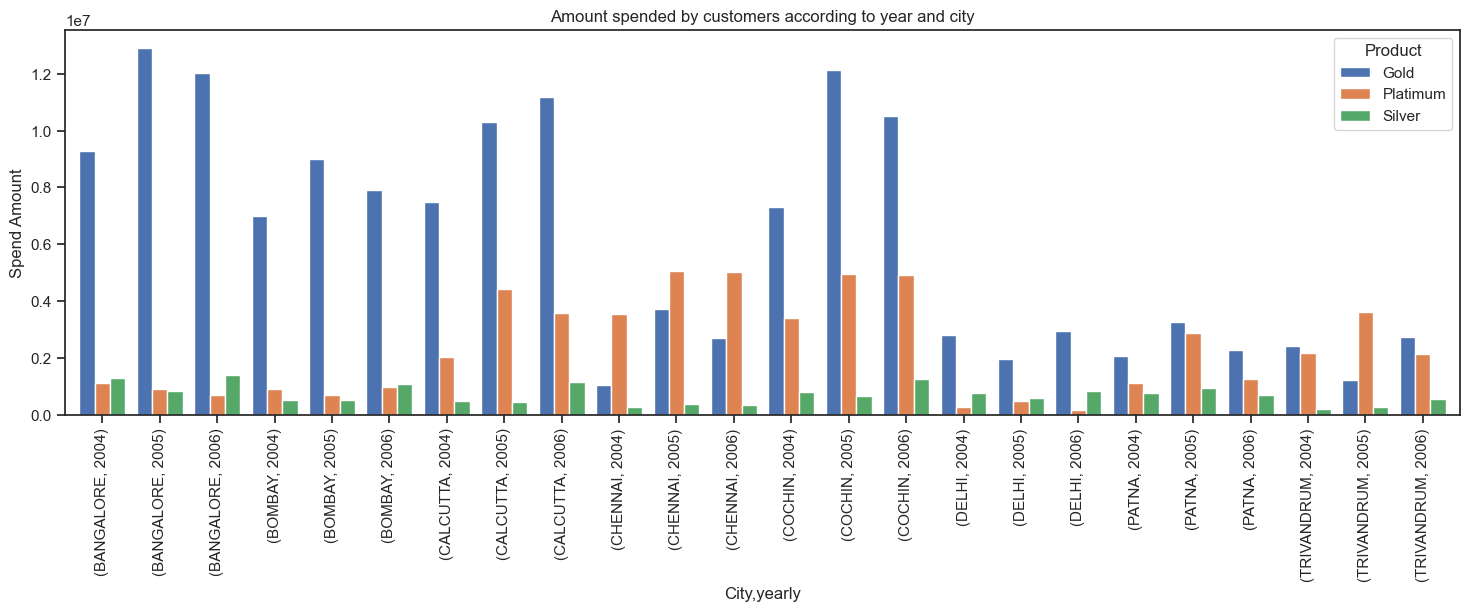

In [19]:
city_wise_spend_plot.plot(kind="bar",figsize=(18,5),width=0.8)
plt.ylabel("Spend Amount")
plt.title("Amount spended by customers according to year and city")
plt.show()

# graph in Q4 part a, not able to create pivot

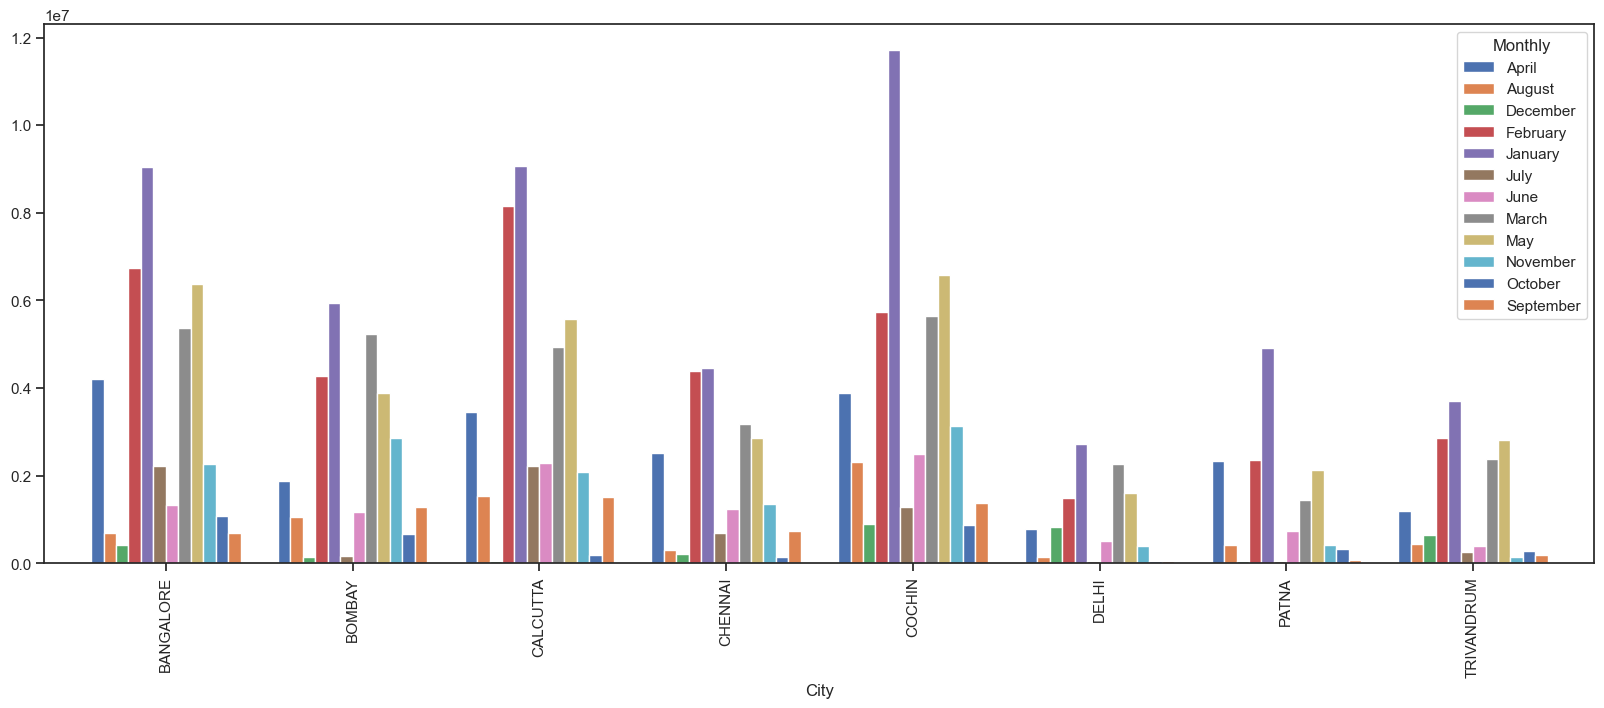

In [23]:
#Q4: a:
cust_spend['Monthly'] = cust_spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
month_spend = cust_spend.groupby(["Monthly","City"])[["Amount"]].sum().sort_index().reset_index()
month_spend =pd.pivot_table(data=cust_spend,values='Amount',index='City',columns='Monthly',aggfunc='sum')
month_spend
month_spend.plot(kind="bar",figsize=(20,7),width=0.8)
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_9160\1313643984.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_ticket['yearly']=air_ticket['Month'].dt.to_period('Y')


<AxesSubplot:xlabel='yearly'>

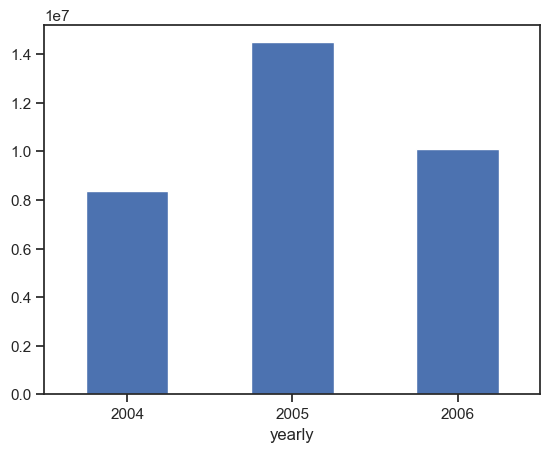

In [24]:
#Q4: b)
spend.head()
air_ticket=spend[spend['Type']=='AIR TICKET']
air_ticket['yearly']=air_ticket['Month'].dt.to_period('Y')
air_ticket
air_ticket_plot=air_ticket.groupby("yearly")["Amount"].sum()
air_ticket_plot.plot.bar(x='yearly',y='Amount',rot=0)


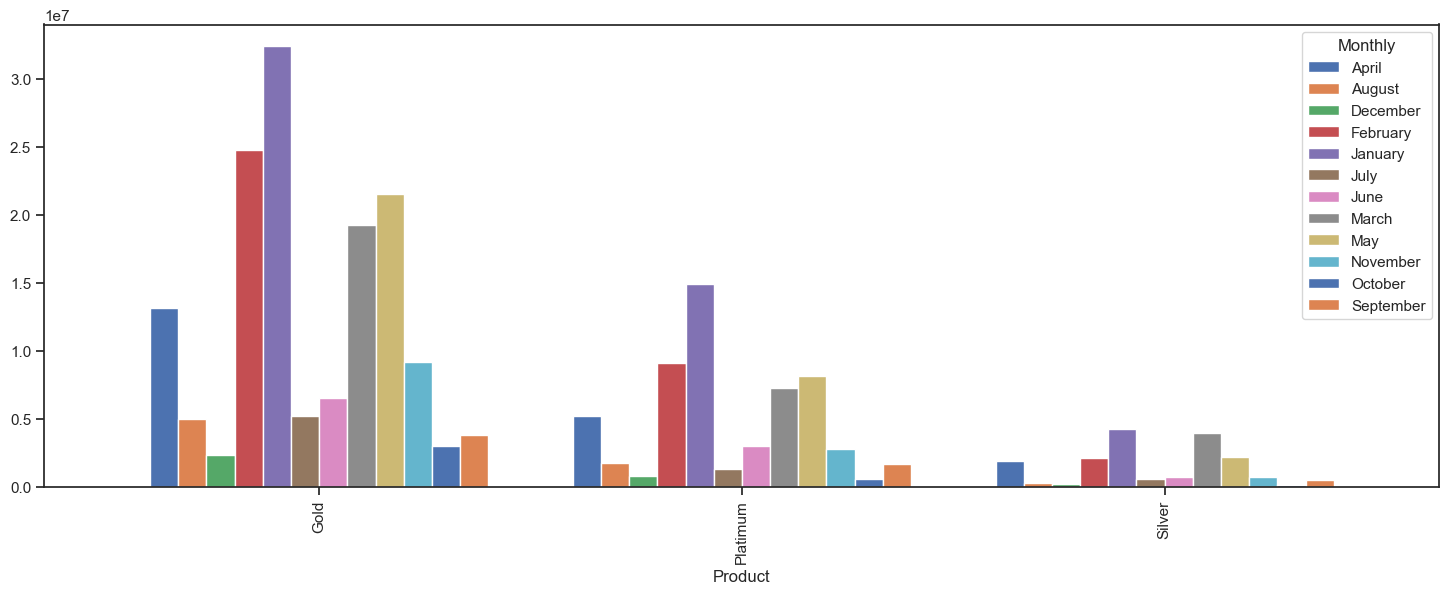

In [26]:
#Q4: c:
prod_spend = pd.pivot_table(data=cust_spend,index='Product',columns='Monthly',values='Amount',aggfunc='sum')
prod_spend.plot(kind="bar",figsize=(18,6),width=0.8)
plt.show()

In [27]:
#Q5
cust_repay['Month'] = pd.to_datetime(cust_repay['Month'])
#creating new column "Monthly" and "Yearly" using already existing 'Month' column
cust_repay['Monthly'] = cust_repay['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
cust_repay['Yearly'] = cust_repay['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [30]:
def top_cust(product,time_period):
    print('Give the product name and time_period for which you want the data')
    if product.lower()=='gold' and time_period.lower()=='monthly':
        table3 = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        result = table3.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='gold' and time_period.lower()=='yearly':
        table3 = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        result = table3.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='silver' and time_period.lower()=='monthly':
        table3 = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        result = table3.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='silver' and time_period.lower()=='yearly':
        table3 = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        result = table3.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    if product.lower()=='platimum' and time_period.lower()=='monthly':
        table3 = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        result = table3.loc[('Platimum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='platimum' and time_period.lower()=='yearly':
        table3 = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        result = table3.loc[('Platimum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    return result

In [31]:
top_cust("platimum","yearly")


Give the product name and time_period for which you want the data


Yearly                              2004        2005        2006
Product  City       Customer                                    
Platimum BANGALORE  A19         50000.00    70000.00    80000.00
                    A37        770552.62  1031641.04   893364.91
                    A5          68809.07    57286.60    40008.00
                    A52        263853.18   769849.81   600012.00
         COCHIN     A21        110022.00   140028.00    80016.00
                    A3          30000.00    50000.00    30000.00
                    A35         31811.80   430194.67   800008.00
                    A41       1752953.17  2486187.34  1241458.03
                    A50        325086.07   338057.45   900000.00
                    A54        490081.00  1829813.48  3255687.64
                    A83              NaN         NaN    10002.00
         CALCUTTA   A20         70007.00    60006.00    70007.00
                    A34         81344.52   372832.64   676907.97
                    A40       2576916.73  2527720.55  1886111.99
                    A49        100020.00   130026.00    80016.00
                    A69              NaN    10000.00    10000.00
                    A98         10001.00         NaN         NaN
                    A99         10002.00         NaN         NaN
         BOMBAY     A33         12275.98    40008.00    80016.00
                    A36        772335.72   856921.95  1100022.00
                    A4          30003.00    40004.00    40004.00
                    A51        423029.79   459351.63   526425.98
                    A70              NaN    20002.00         NaN
                    A71         10002.00    10002.00         NaN
         CHENNAI    A38       1951311.01  2408626.65  3111018.69
                    A47         60000.00   160000.00    90000.00
                    A56         36537.90   966666.69  3295868.87
         TRIVANDRUM A39       1342503.16  3699578.97  2580401.17
                    A48         70007.00   140014.00   100010.00
                    A97         10000.00         NaN         NaN
         PATNA      A55        335081.18   708035.12  2874384.90
         DELHI      A53        440318.31   679941.09   450320.75